# Dummy marketing and Sales Data

This data contains a number of products' sales with corresponding budgets (TV, Radio, Social Media, Influencer)

In [220]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [221]:
df=pd.read_csv('../Денис/dataset/Dummy Data HSS.csv')

In [222]:
print(df.shape)
df.head(15)

(4572, 5)


,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
5,29.0,9.614382,1.027163,Mega,105.889148
6,55.0,24.893811,4.273602,Micro,198.679825
7,31.0,17.355042,2.289855,Nano,108.733932
8,76.0,24.648898,7.130116,Macro,270.189400
9,13.0,0.431128,2.229423,Mega,48.280582


1. **TV** - TV budget, in mln 
2. **Radio** - Radio budet, in mln \n
3. **SM**- Social Media budget, in mln
4. **Influencer** - Affiliate marketing through well-known persons, the popularity is measured by (Nano,Micro,Macro,Mega)
5. **Sales** in mln

### Cleaning the data

In [223]:
print(df.isnull().sum())
df.info()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


Since we have a small number of Nan, we can simply remove them

In [224]:
df.dropna(inplace=True)
df.shape

(4546, 5)

### Exploratory data analysis

In [225]:
df.describe()

,TV,Radio,Social Media,Sales
count,4546.000000,4546.000000,4546.000000,4546.000000
mean,54.062912,18.157533,3.323473,192.413332
std,26.104942,9.663260,2.211254,93.019873
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.555355,1.530822,112.434612
50%,53.000000,17.859513,3.055565,188.963678
75%,77.000000,25.640603,4.804919,272.324236
max,100.000000,48.871161,13.981662,364.079751


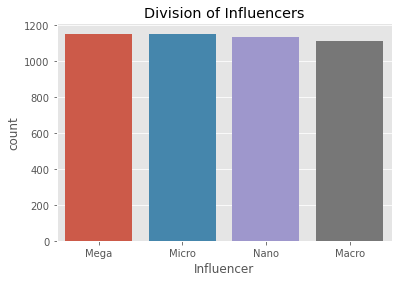

In [226]:
sns.countplot(x='Influencer',data=df).set_title('Division of Influencers');

In [227]:
col=['Sales','TV','Radio','Social Media']

In [ ]:
f=plt.figure(figsize=(12,7))
for i,cols in enumerate(df[col]):
    ax=f.add_subplot(2,2,i+1)
    sns.boxplot(y=cols,data=df,x='Influencer')
    ax.set_title('The boxplot of '+cols+' by influencers')
f.tight_layout()

In [ ]:
def plottec(kind,col):
    fig=plt.figure(figsize=(12,7))
    for i, feature in enumerate(col):
            ax=fig.add_subplot(2,2,i+1)
            df.groupby('Influencer')[feature].sum().plot(ax=ax,kind=kind)
            ax.set_title(feature+" Distribution by Influencer",color='DarkRed')

    fig.tight_layout()  
    plt.show()

In [ ]:
plottec('bar',col)

In [ ]:
sns.pairplot(df);

### Prediction of Sales

Since we want to predict a number of sales depending on our features, lets ,first of all, transform our categorical variables into numeric ones. As we have a gradation, we use a label encoder

In [ ]:
df1=df
df1['Influencer']=df1['Influencer'].replace({'Mega':3,'Macro':2,'Micro':1,'Nano':0})

In [ ]:
df1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

We are going to asses models by following metrics: **MSE, R-squared**

In [ ]:
def metrics(test,pred):
    print('MSE',round(mean_squared_error(test,pred),15))
    print('MAE',round(mean_absolute_error(test,pred),15))
    print('RMSE',round(np.sqrt(mean_squared_error(test,pred)),15))
    print('R2',round(r2_score(test,pred),15))

In [ ]:
y=df1['Sales']
x=df1.drop('Sales',axis=1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1111)

Lets create a **Decision tree** for regression problems

In [ ]:
dt=DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.1,random_state=1111)
dt.fit(x_train,y_train)
y_pred_tree=dt.predict(x_test)

In [ ]:
metrics(y_test,y_pred_tree)

Also lets conduct **cross validation**

In [ ]:
cross_r2=cross_val_score(dt,x,y,cv=10).mean()
cross_mse=cross_val_score(dt,x,y,cv=10,scoring='neg_mean_squared_error').mean()
print('MSE',-cross_mse)
print('R2',cross_r2)

We can observe a pretty good R squared, which is spectacular result. Lets try **Multiple Regression**

In [ ]:
pipe=Pipeline(steps=[('scale',StandardScaler())])

In [ ]:
x_train=pipe.fit_transform(x_train)
x_test=pipe.transform(x_test)
lm=LinearRegression()
lm.fit(x_train,y_train)
y_pred=lm.predict(x_test)
metrics(y_test,y_pred)

Also lets conduct **cross validation**

In [ ]:
cross_r2_reg=cross_val_score(lm,x,y,cv=10).mean()
cross_mse_reg=cross_val_score(lm,x,y,cv=10,scoring='neg_mean_squared_error').mean()
print('MSE',-cross_mse_reg)
print('R2',cross_r2_reg)

#### Compare perfomance

In [ ]:
if cross_mse>cross_mse_reg: print('Decision tree is better in terms of MSE')
else: print('Linear Regression  is better in terms of MSE')
    
if cross_r2>cross_r2_reg: print('Decision tree is better in terms of R2')
else: print('Linear Regression  is better in terms of R2')

Seems that Linear Regression perfoms much better, lets check our residuals for normality

In [ ]:
sns.distplot((y_test-y_pred))
plt.title('Distribution of residuals')
plt.xlabel('Residuals');

In [ ]:
from scipy.stats import shapiro
shapiro(y_test-y_pred)

In [ ]:
sns.scatterplot(x=y_test,y=y_pred)
plt.title('Checking for normality')
plt.ylabel('Predicted values')
plt.xlabel('True values');

### The assumptions of Linear regression are met, residuals have mean 0 and normal curve, but lets check model for multicollinearity

In [ ]:
sns.heatmap(df1[col].corr(),annot=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Vif factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['feature']=x.columns

In [ ]:
vif.round(1).sort_values(by='Vif factor',ascending=False)

Indeed, **TV and Radio** are highly correlated that mess our model, lets remove the most correlated

In [ ]:
df2=df1.drop('Radio',axis=1)

In [ ]:
y2=df2['Sales']
x2=df2.drop('Sales',axis=1)

In [ ]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2,random_state=1111)

In [ ]:
x2_train=pipe.fit_transform(x2_train)
x2_test=pipe.transform(x2_test)
lm=LinearRegression()
lm.fit(x2_train,y2_train)
y2_pred=lm.predict(x2_test)
metrics(y2_test,y2_pred)

## Eventually, we see that Linear regression perfoms better compared to Decision Tree